Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [ ]:
house_price_dataset = sklearn.datasets.load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
print(house_price_dataset)

In [ ]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [ ]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

In [ ]:
# add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [ ]:
house_price_dataframe.head()

In [ ]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

In [ ]:
# check for missing values
house_price_dataframe.isnull().sum()

In [ ]:
# statistical measures of the dataset
house_price_dataframe.describe()

Understanding the correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

In [ ]:
correlation = house_price_dataframe.corr()

In [ ]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and Target

In [ ]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [ ]:
print(X)
print(Y)

Splitting the data into Training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

Model Training

XGBoost Regressor

In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

Evaluation

Prediction on training data

In [ ]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

Visualizing the actual Prices and predicted prices

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data

In [ ]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

rough-1

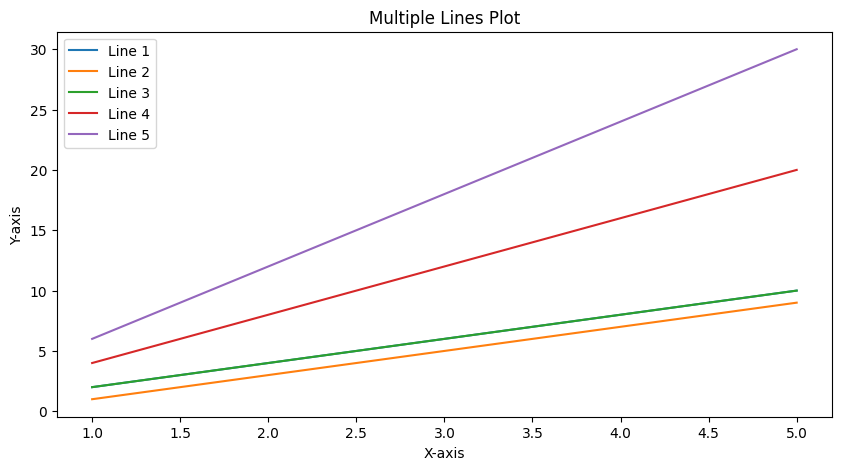

In [5]:
import matplotlib.pyplot as plt
# Plotting a simple line chart
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
plt.figure(figsize=(10,5))
plt.plot(x, y, label='Line 1')
# Plotting multiple lines
y2 = [1, 3, 5, 7, 9]
plt.plot(x, y2, label='Line 2')
# Plotting several lines
for i in range(1, 4):
    plt.plot(x, [n * i for n in y], label=f'Line {i+2}')
plt.title('Multiple Lines Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()



rough-2

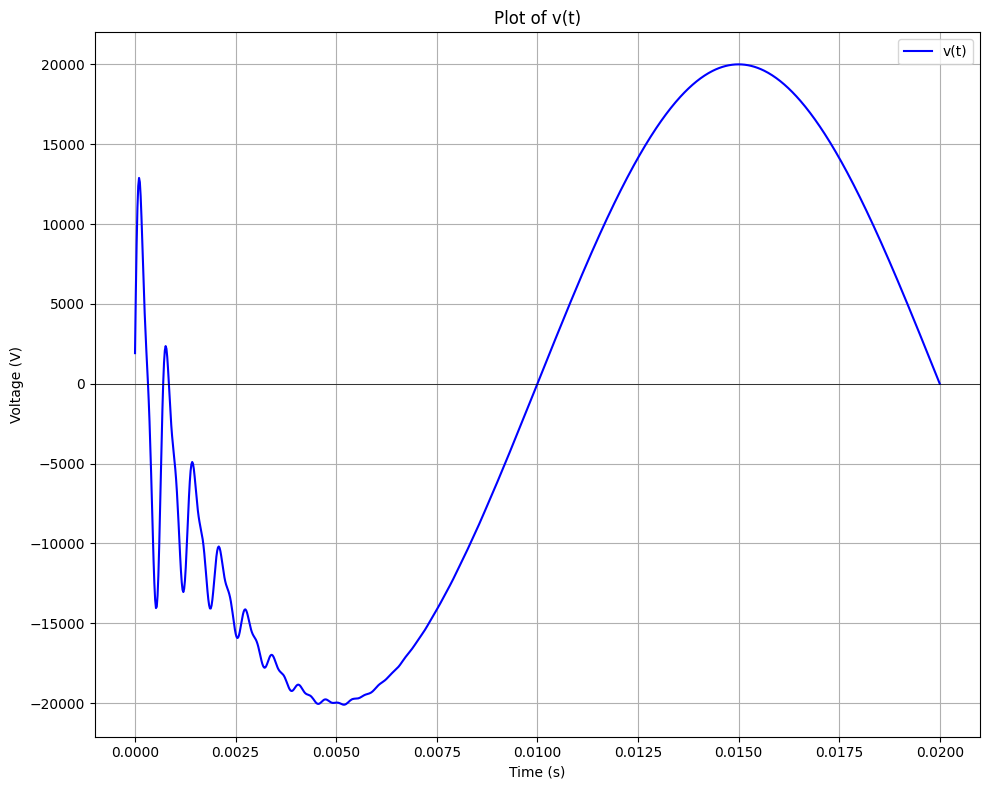

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector
t = np.linspace(0, 0.02, 1000)

# Voltage function to match the image
v = (
    15000 * np.exp(-1000 * t) * np.sin(2 * np.pi * 1500 * t) +   # sharp starting spike
    4000 * np.exp(-800 * t) * np.sin(2 * np.pi * 3000 * t + 0.5) +  # ripple
    -20000 * np.sin(2 * np.pi * 50 * t)  # large smooth low-frequency wave
)

# Plot
plt.figure(figsize=(10, 8))
plt.plot(t, v, label='v(t)', color='blue')

plt.title('Plot of v(t)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()
